### 15. 3Sum
---
Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0? Find all unique triplets in the array which gives the sum of zero.

Notice that the solution set must not contain duplicate triplets.

Example 1:

Input: nums = [-1,0,1,2,-1,-4] <br>
Output: [[-1,-1,2],[-1,0,1]]<br>


Example 2:

Input: nums = []<br>
Output: []<br>

Example 3:

Input: nums = [0]<br>
Output: []

### 세 수의 합 
---
배열을 입력받아 합으로 0을 만들 수 있는 3개의 엘리먼트를 출력하라.

* __입력__
>  [-1,0,1,2,-1,-4]
* __출력__
> [ [-1,-1,2],<br>
    [-1,0,1] ]

###  풀이 1. 브루트 포스 계산
---
가장 먼저 브루트 포스로 풀이해보자. 언뜻 보면 _O(n^3)_ 정도의 풀이가 가능해 보인다. 그러나 이 경우 타임아웃이 발생해 풀리지 않을 것도 같다. 아마 이 문제는 시간 복잡도를 _O(n^2)_ 이내로 줄이기를 요구할 것이다. 어쨋든 일단 쉽게 접근할 수 있는 브루트 포스풀이법을 한번 시도해보자. 앞뒤로 같은 값이 있을 경우, 이를 쉽게 처리하기 위해 먼저 다음과 같이 sort()함수를 사용해 정렬 부터 한다.

    nums.sort()
    
정렬하지 않아도 조금만 신경쓰면 처리할 수 있을 것 같지만, 편의상 정렬해서 문제 풀이를 간소화해보자. 정렬의 시간 복잡도는 _O(n log n)_ 이며, 6장에서 살펴본 바와 같이 파이썬의 팀소트는 정렬 속도가 매우 빠르다. 입력값 [-1,0,1,2,-1,-4]를 정렬한 결과인 [-4,-1,-1,0,1,2]로 풀이를 도식화해보면 그림 7-7과 같다.

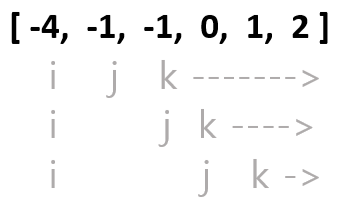
* __그림 7-7__ 브루트 포스 풀이

이 그림에서 i,j,k 각각의 포인터가 계속 이동하면서 i+j+k = 0을 찾아낸다. 이런 표현은 들어본 적이 없지만 굳이 이름을 부여하자면, 투포인터가 아닌 쓰리 포인터 풀이 정도라 할 수 있을 것 같다(투 포인터에 대해서는 189페이지의 설명을 참고하자). 이 브루트 포스 풀이에는 중복된 값이 있을 수 있으므로 이 경우 다음과 같이 countinue로 건너뛰도록 처리한다.

    if i > 0 and nums[i] == nums[i - 1]:
        continue
        
이제 전체 코드는 다음과 같다.

In [ ]:
def threeSum(self, nums: List[int]) -> List[List[int]]:
    results = []
    nums.sort()
    
    # 브루트 포스 n^3 반복
    for i in range(len(nums) - 2):
        # 중복된 값 건너뛰기
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        for j in range(i+1,len(nums) - 1):
            if j > i and nums[j] == nums[j -1]:
                continue
            for k in range(j+1, len(nums)):
                if k > j and nums[k] == nums[k - 1]:
                    continue
                if nums[i] + nums[j] + nums[k] == 0:
                    result.append((nums[i], nums[j], nums[k]))
    return results

틀린 부분은 없지만 예상대로 이 방식으로는 문제가 풀리지 않는다. 타임아웃으로 풀이에 실패한다. 이제 문제가 풀릴 수 있도록 _O(n^2)_ 이내로 최적화를 진행해보자.

### 풀이 2. 투 포인터로 합 계산
---
i를 축으로 하고, 중복된 값을 건너뛰게 한 부분은 다음과 같이 앞서 풀이와 동일하다.

    for i in range(len(nums)-2):
        if i > 0 and nums[i] == nums[i - 1]:
            continue
            
여기서 풀이 #1과 마찬가지로 중복된 값인 경우 continue로 건너뛴다. 이제 중복이 아닌 경우 투 포인터로 풀이할 수 있다. 이를 도식화해보면 그럼 7-8과 같다.

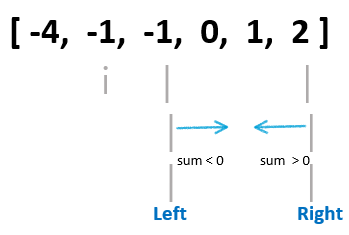
* __그림 7-8__ 투 포인터 풀이 

앞서 풀이 #1과 차이점은 i의 다음 지점과 마지막 지점을 이 그림과 같이 left, right로 설정하고 간격을 좁혀가며 sum을 계산하는 부분이다. 이 부분은 코드로 구현해보면 다음과 같다.

    left, right = i + 1, len(nums) - 1
    while left < right:
        sum = num[i] + nums[left] + nums[right]
        
투 포인터가 간격을 좁혀나가며 합 sum을 계산한다. 이제 다음 코드를 살펴보자.

    if sum < 0:
        left += 1
     elif sum > 0:
         right -= 1
         
sum이 0보다 작다면 값을 더 키워야 하므로 left를 우측으로 이동하고, 0보다 크다면 값을 더 작게 하기 위해 right를 좌측으로 이동한다.

    if sum < 0:
        ...
    elif sum > 0:
        ...
    else:
        results.append((nums[i], nums[left], nums[right]
        
        while left < right and nums[left] == nums[left + 1]
            left += 1
        while left > right and nums[right] == nums[right - 1]:
            right -= 1
            
sum=0이면 정답이므로, 이 경우 결과를 리스트 변수 results에 추가한다. 추가한 다음에는 left,right 양 옆으로 동일한 값이 있을 수 있으므로 이를 left+=1, right-=1을 반복해서 스킵하도록 처리한다.
    
    left += 1
    right -= 1
    
마지막으로 left를 한 칸 우측으로, right를 한 칸 왼쪽으로 더 이동하고 다음으로 넘긴다. 
얼핏 생각해보면 left 또는 right 둘 중 하나만 이동해야 하는게 아닌가 싶지만, 어차피 sum=0인 상황이므로 어느 한쪽만 이동하는 경우는 불가능하다. 나머지 값을 찾으려면 결국 둘 다 움직여야 한다. 앞서 설명한 내용들을 모두 정리하면, 전체 코드는 다음과 같다.

In [ ]:
def threeSum(self, nums: List[int]) -> List[List[int]]:
    results = []
    nums.sort()

    for i in range(len(nums) - 2):
        # 중복된 값 건너뛰기
        if i > 0 and nums[i] == nums[i - 1]:
            continue

        # 간격을 좁혀가며 합 `sum` 계산
        left, right = i + 1, len(nums) - 1
        while left < right:
            sum = nums[i] + nums[left] + nums[right]
            if sum < 0:
                left += 1
            elif sum > 0:
                right -= 1
            else:
                # `sum = 0`인 경우이므로 정답 및 스킵 처리
                results.append((nums[i], nums[left], nums[right]))

                while left < right and nums[left] == nums[left + 1]:
                    left += 1
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                
                left += 1
                right -= 1

    return results